<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/Rosenbrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us now take a look into another state of the art minimization algorithm:

Enter the **Rosenbrock** method:

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from IPython.display import display, Math

Let's define the 2D function we will be working with and plot its level curves

<IPython.core.display.Math object>

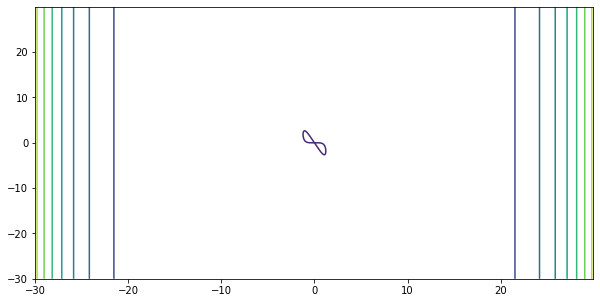

In [2]:
def f(x):
    return x[0]**6 + 3*x[0]*x[1] + x[1]**2

def plot_contour(f):
    x = np.arange(-30,30,0.05)
    y = np.arange(-30,30,0.05)
    X, Y = np.meshgrid(x,y)
    Z = f([X,Y])
    fig, ax = plt.subplots(figsize = (10,5))
    CS = ax.contour(X,Y,Z)
    return 

display(Math(f' f(x1,x2) = x1^6 + 3x2x2 +x2^2'))

plot_contour(f)

Nice. Now let's run the algorithm from a random starting point

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


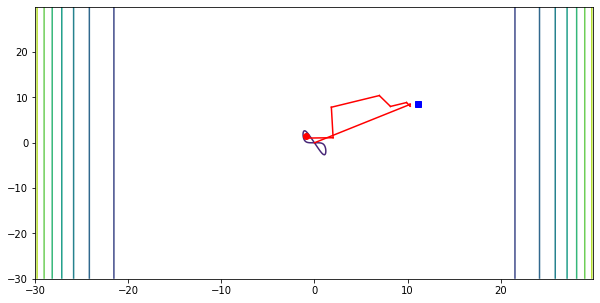

In [3]:
d1 = [1,0]
d2 = [0,1]

d = np.array((d1,d2))
s = [1,.5]

alpha = 3;
beta = -0.8
n = 2

current = []
for i in range(n):
    rndel = random.random() * 30
    current.append(rndel)

start = current.copy()

plot_contour(f)
trajectory = np.zeros((200, 2))
k = 0

record = np.zeros((2, 1))

for i in range(100):

    c = [0, 0]
    success = [0, 0]
    fail = [0, 0]
    oscillation = False

    while oscillation is False and k < 20:

        for j in range(2):

            newpoint = current + s[j] * d[j, :]

            if (f(newpoint)) < (f(current)):

                current = newpoint

                success[j] = 1
                c[j] = c[j] + s[j]
                s[j] = s[j] * alpha
                k += 1
                trajectory[k, :] = current
                plt.plot([trajectory[k-1, 0], current[0]], [trajectory[k-1, 1], current[1]], 'r')

            else:
                fail[j] = 1
                s[j] = s[j] * beta

        if all(success) and all(fail):
            oscillation = True

    a1 = c[0] * d[0, :] + c[1] * d[1, :]
    a2 = c[1] * d[1, :]

    b1 = a1
    d1 = b1 / np.linalg.norm(b1, 2)

    b2 = a2 - np.divide((a2 @ b1.T), np.linalg.norm(b1, 2) ** 2) * b1
    d2 = b2 / np.linalg.norm(b2, 1)

    d = np.array((d1, d2))

plt.plot(current[0], current[1], 'ro')
plt.plot(start[0], start[1], 'bs')

As you can see, it found the one of the two minima using orthogonal directions rather quick and even better than the Nelder Mead method